In [13]:
import pandas as pd

votes = pd.read_csv('/content/Vote_Shares.csv')


votes.head()


,Unnamed: 0,state,candidate,vote_share
0,0,Delaware,Joe Biden,58.782167
1,1,Delaware,Donald Trump,39.801393
2,2,Delaware,Jo Jorgensen,0.992044
3,3,District of Columbia,Joe Biden,92.149694
4,4,District of Columbia,Donald Trump,5.397321


In [14]:
import pandas as pd

party = pd.read_csv('/content/Effect_of_ThirdParty.csv')

party.head()

,Unnamed: 0,state,Winning Party,Losing Party,Vote Margin,LIB Votes,Analysis
0,0,Delaware,Democratic,Republican,95665,5000,LIB votes were less than the margin and likely...
1,1,District of Columbia,Democratic,Republican,298737,2036,LIB votes were less than the margin and likely...
2,2,Florida,Republican,Democratic,371686,70324,LIB votes were less than the margin and likely...
3,3,Georgia,Democratic,Republican,11779,62229,LIB votes could have potentially affected the ...
4,4,Hawaii,Democratic,Republican,169266,5539,LIB votes were less than the margin and likely...


In [18]:
merged_df = pd.merge(votes, party, on='state')
print(merged_df)

     Unnamed: 0_x                 state     candidate  vote_share  \
0               0              Delaware     Joe Biden   58.782167   
1               1              Delaware  Donald Trump   39.801393   
2               2              Delaware  Jo Jorgensen    0.992044   
3               3  District of Columbia     Joe Biden   92.149694   
4               4  District of Columbia  Donald Trump    5.397321   
..            ...                   ...           ...         ...   
148           148           Connecticut  Donald Trump   39.209496   
149           149           Connecticut  Jo Jorgensen    1.108766   
150           150               Arizona     Joe Biden   49.364691   
151           151               Arizona  Donald Trump   49.055981   
152           152               Arizona  Jo Jorgensen    1.519340   

     Unnamed: 0_y Winning Party Losing Party  Vote Margin  LIB Votes  \
0               0    Democratic   Republican        95665       5000   
1               0    Democr

In [19]:
merged_df.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis=1, inplace=True)

print(merged_df)

                    state     candidate  vote_share Winning Party  \
0                Delaware     Joe Biden   58.782167    Democratic   
1                Delaware  Donald Trump   39.801393    Democratic   
2                Delaware  Jo Jorgensen    0.992044    Democratic   
3    District of Columbia     Joe Biden   92.149694    Democratic   
4    District of Columbia  Donald Trump    5.397321    Democratic   
..                    ...           ...         ...           ...   
148           Connecticut  Donald Trump   39.209496    Democratic   
149           Connecticut  Jo Jorgensen    1.108766    Democratic   
150               Arizona     Joe Biden   49.364691    Democratic   
151               Arizona  Donald Trump   49.055981    Democratic   
152               Arizona  Jo Jorgensen    1.519340    Democratic   

    Losing Party  Vote Margin  LIB Votes  \
0     Republican        95665       5000   
1     Republican        95665       5000   
2     Republican        95665       500

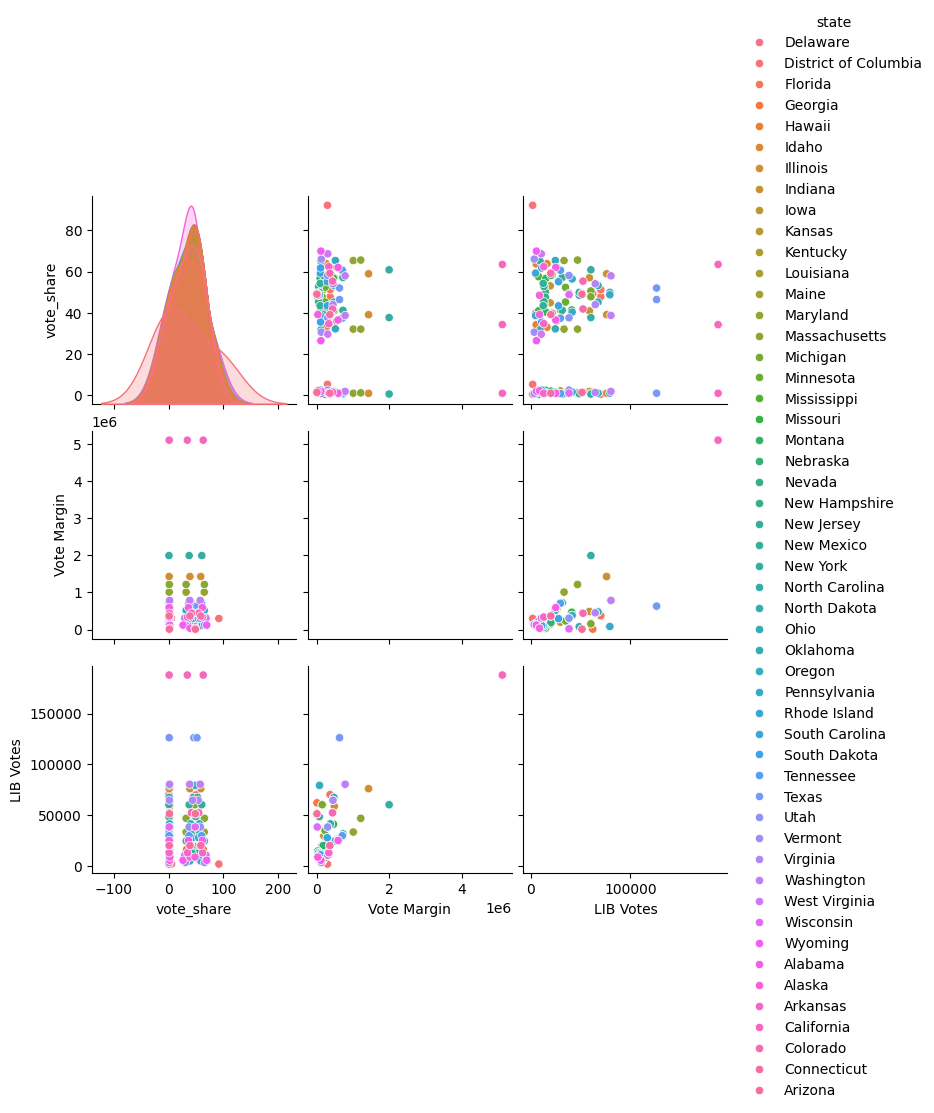

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#im visualizing my data using seaborn pairing

sns.pairplot(merged_df, hue='state')
plt.show()

In [17]:
merged_df.dropna(inplace=True)

In [36]:
from sklearn.model_selection import train_test_split

X= merged_df.drop(['state','candidate','Analysis','Winning Party', 'Losing Party'], axis= 1)
y= merged_df['vote_share']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(122, 3)
(31, 3)
(122,)
(31,)


In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#algorithm used and training

model = RandomForestClassifier()
model.fit(X_train, y_train)

#evaluating model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.0


In [44]:
import joblib
joblib.dump(model, 'voter_support_prediction_model.pkl')

['voter_support_prediction_model.pkl']